In [2]:
import pandas as pd
import pytreebank , os , sys
import datasets
import matplotlib.pyplot as plt

In [3]:
#Get Datasets [train,dev,test] in a tree format 
path = "./data/trainDevTestTrees_PTB/trees"

In [4]:
#load 3 data files
data = pytreebank.load_sst(path)

In [5]:
#test [converting the data to label-text]
for item in data["train"]:
    print(item.to_labeled_lines()[0][0] , item.to_labeled_lines()[0][1])
    break

3 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .


In [6]:
#output new formation 
out_path = os.path.join("./data/trainDevTestTrees_PTB/sst_{}.txt")

In [7]:
#iterate on every dataset and convert the tree format to simple text
for cat in ["train", "test" , "dev"]:
    with open(out_path.format(cat) , "w") as file :
        for item in data[cat]:
            file.write(
                "{}\t{}\n".format(
                    item.to_labeled_lines()[0][0]+1, 
                    item.to_labeled_lines()[0][1]
                )
            )
    print("done with {}".format(file))

done with <_io.TextIOWrapper name='./data/trainDevTestTrees_PTB/sst_train.txt' mode='w' encoding='UTF-8'>
done with <_io.TextIOWrapper name='./data/trainDevTestTrees_PTB/sst_test.txt' mode='w' encoding='UTF-8'>
done with <_io.TextIOWrapper name='./data/trainDevTestTrees_PTB/sst_dev.txt' mode='w' encoding='UTF-8'>


In [8]:
#convert it to DataFrame
train = pd.read_csv("./data/trainDevTestTrees_PTB/sst_train.txt" ,sep="\t",header=None,names=['label','text'])

In [9]:
train.head(5)

,label,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .


In [10]:
#replace __label__ to a space
#train["label"] = train["label"].str.replace("__label__" , "")

train["label"] = pd.to_numeric(train["label"])
train["label"].apply(lambda x : x - 1)

0       3
1       4
2       3
3       2
4       3
       ..
8539    0
8540    1
8541    3
8542    0
8543    1
Name: label, Length: 8544, dtype: int64

In [12]:
#create dictionary to contain a three file and convert them to CSV files
dataset = dict()
for data in ["train" , "dev" , "test"]:
    #read three dataset file
    file = pd.read_csv(f"./data/trainDevTestTrees_PTB/sst_{data}.txt" ,sep="\t",header=None,names=['label','text'])
    #replace __label__ with space and convevrt it to int type
    #file["label"] = pd.to_numeric(file["label"].str.replace("__label__" , ""))
    #apply sub to get label range from[0-4] instead of [1-5]
    file["label"] = file["label"].apply(lambda x : x - 1) 
    #change the pos of columns
    file=file[["text" , "label"]]
    dataset[data]= file

In [16]:
#create CSV file for Train , dev and test sets
for i in dataset:
    #dataset[i].to_csv(f"../data/Cleaned_data/{i}.csv" , index=False)
    dataset[i] = f"../data/cleaned_data/{i}.csv"

In [17]:
Rotten_tomato_movies = datasets.load_dataset("csv" , data_files = dataset)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating dev split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /home/omar-emam/.cache/huggingface/datasets/csv/default-65fcc2227918e882/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [18]:
labelStr = ["Very negative" ,"negative" , "natural" , "posative","Very posative"]

In [19]:
def modifyLabelIdx(row):
    pass 

In [20]:
Rotten_tomato_movies["train"].features["label"]

Value(dtype='int64', id=None)

In [22]:
Rotten_tomato_movies = Rotten_tomato_movies.cast_column("label" , datasets.ClassLabel(names=["Very_negative" ,"negative" , "natural" , "posative","Very_posative"] , num_classes=5))

Casting the dataset:   0%|          | 0/8544 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1101 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [23]:
Rotten_tomato_movies["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Very_negative', 'negative', 'natural', 'posative', 'Very_posative'], id=None)}

In [24]:
Rotten_tomato_movies.set_format(type="pandas")
df = Rotten_tomato_movies['train'][:]
df.head(5)

,text,label
0,The Rock is destined to be the 21st Century 's...,3
1,The gorgeously elaborate continuation of `` Th...,4
2,Singer/composer Bryan Adams contributes a slew...,3
3,You 'd think by now America would have had eno...,2
4,Yet the act is still charming here .,3


In [25]:
def label_int_toStr(row):
  return Rotten_tomato_movies['train'].features["label"].int2str(row)
df["label_name"] = df['label'].apply(label_int_toStr)
df.head()

,text,label,label_name
0,The Rock is destined to be the 21st Century 's...,3,posative
1,The gorgeously elaborate continuation of `` Th...,4,Very_posative
2,Singer/composer Bryan Adams contributes a slew...,3,posative
3,You 'd think by now America would have had eno...,2,natural
4,Yet the act is still charming here .,3,posative


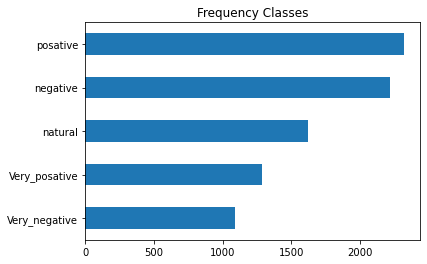

In [26]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency Classes")
plt.show()

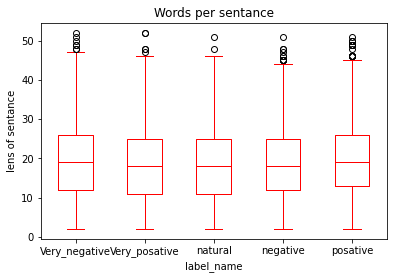

In [27]:
df["Words per sentance"] = df['text'].str.split().apply(len)
df.boxplot("Words per sentance", by="label_name" ,grid=False ,showfliers=True , color="red")
plt.suptitle("")
plt.ylabel("lens of sentance")
plt.show()

In [28]:
Rotten_tomato_movies.reset_format()